##Inisialisasi

In [1]:
#Impor Package dan Libraries yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Impor dataset
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fintech Demo Day/train.csv', sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fintech Demo Day/test.csv', sep=';')

#Preprocessing Data

In [3]:
#membuat kategori umur
df_train['age_bin'] = pd.cut(df_train['age'], [0, 20, 30, 40, 50, 60, 100], 
                              labels=['0-20','20-30','30-40','40-50','50-60','60+'])
df_train = df_train.drop('age',axis = 1)

df_test['age_bin'] = pd.cut(df_test['age'], [0, 20, 30, 40, 50, 60, 100], 
                              labels=['0-20','20-30','30-40','40-50','50-60','60+'])
df_test = df_test.drop('age',axis = 1)

In [4]:
#normalisasi data numerik
df_train['balance'] = df_train['balance'].agg(lambda x :(x-x.mean())/(x.std()))
df_test['balance'] = df_test['balance'].agg(lambda x :(x-x.mean())/(x.std()))
df_train['duration'] = df_train['duration'].agg(lambda x :(x-x.mean())/(x.std()))
df_test['duration'] = df_test['duration'].agg(lambda x :(x-x.mean())/(x.std()))
df_train['pdays'] = df_train['pdays'].agg(lambda x :(x-x.mean())/(x.std()))
df_test['pdays'] = df_test['pdays'].agg(lambda x :(x-x.mean())/(x.std()))

In [5]:
#one-hot-encoding untuk mengubah seluruh data kategorikal menjadi numerik
df_train = pd.get_dummies(df_train, columns=['job','marital','education','default','housing','loan','contact','month','poutcome','age_bin'], drop_first=False, dtype=np.int64)
df_test = pd.get_dummies(df_test, columns=['job','marital','education','default','housing','loan','contact','month','poutcome','age_bin'], drop_first=False, dtype=np.int64)

In [6]:
#mengubah data kategori pada label menjadi data biner
df_train['y'].replace(['yes','no'],[1,0], inplace=True)
df_test['y'].replace(['yes','no'],[1,0], inplace=True)

In [7]:
#teknik oversampling: memperbanyak label 'yes' agar perbandingan 'yes':'no' = 1:3
df_train_no = df_train[df_train['y'] == 0]
df_train_yes = df_train[df_train['y'] == 1]
df_train = pd.concat([df_train, df_train_yes, df_train_yes])
df_train = df_train.reset_index(drop = True)

In [8]:
x_test = df_test.drop('y',axis = 1)
y_test = df_test['y']

#Neural Network Model

In [9]:
X = df_train.drop('y',axis = 1)
y = df_train['y']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=2022)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(42, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                2394      
                                                                 
 batch_normalization (BatchN  (None, 42)               168       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 17)                731       
                                                                 
 dense_2 (Dense)             (None, 1)                 18        
                                                                 
Total params: 3,311
Trainable params: 3,227
Non-trainable params: 84
_________________________________________________________________


In [11]:
history = model.fit(
  x_train, y_train,
  validation_data=(x_val, y_val),
  epochs=500)

Epoch 1/500
1570/1570 [==============================] - 13s 7ms/step - loss: 0.4897 - accuracy: 0.7670 - val_loss: 0.3645 - val_accuracy: 0.8389
Epoch 2/500
1570/1570 [==============================] - 10s 6ms/step - loss: 0.3531 - accuracy: 0.8397 - val_loss: 0.3389 - val_accuracy: 0.8500
Epoch 3/500
1570/1570 [==============================] - 7s 5ms/step - loss: 0.3364 - accuracy: 0.8468 - val_loss: 0.3242 - val_accuracy: 0.8589
Epoch 4/500
1570/1570 [==============================] - 5s 3ms/step - loss: 0.3296 - accuracy: 0.8488 - val_loss: 0.3189 - val_accuracy: 0.8605
Epoch 5/500
1570/1570 [==============================] - 5s 3ms/step - loss: 0.3242 - accuracy: 0.8511 - val_loss: 0.3236 - val_accuracy: 0.8580
Epoch 6/500
1570/1570 [==============================] - 4s 3ms/step - loss: 0.3193 - accuracy: 0.8546 - val_loss: 0.3199 - val_accuracy: 0.8618
Epoch 7/500
1570/1570 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8577 - val_loss: 0.3102 - val_

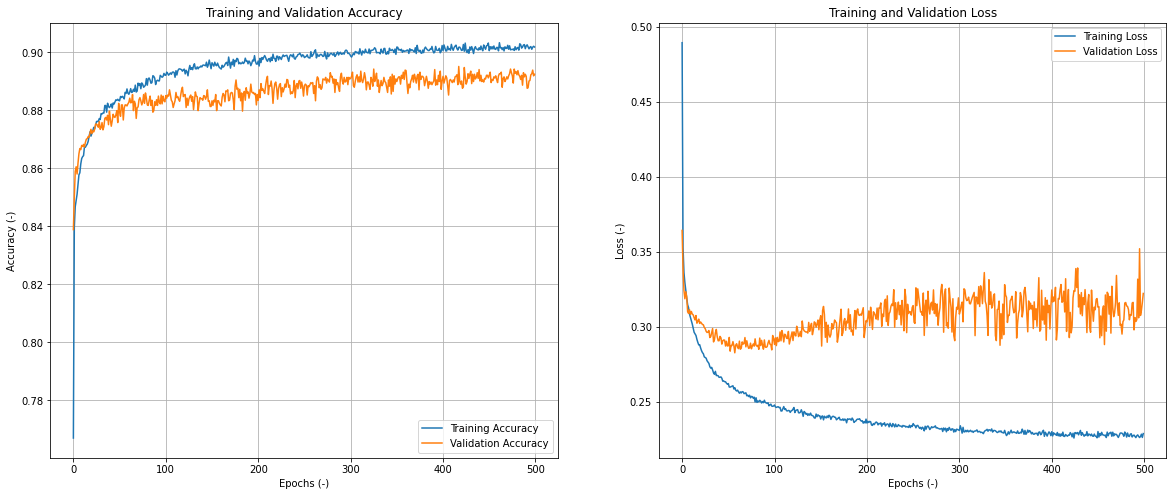

In [12]:
# Plot Accuracy dan Loss History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.grid(True)
plt.xlabel("Epochs (-)")
plt.ylabel("Accuracy (-)")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel("Epochs (-)")
plt.ylabel("Loss (-)")
plt.title('Training and Validation Loss')
plt.show()

In [13]:
#Menentukan confusion matrix dan classification report untuk data validasi
y_predict=(model.predict(x_val) > 0.5).astype("int32")
confusion_matrix(y_val, y_predict, labels=[0, 1])

175/175 [==============================] - 0s 2ms/step


array([[3620,  333],
       [ 267, 1359]])

In [14]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3953
           1       0.80      0.84      0.82      1626

    accuracy                           0.89      5579
   macro avg       0.87      0.88      0.87      5579
weighted avg       0.89      0.89      0.89      5579



In [15]:
#Menentukan confusion matrix dan classification report untuk data prediksi
preds=(model.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test, preds, labels=[0, 1])

142/142 [==============================] - 0s 2ms/step


array([[3699,  301],
       [  77,  444]])

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      4000
           1       0.60      0.85      0.70       521

    accuracy                           0.92      4521
   macro avg       0.79      0.89      0.83      4521
weighted avg       0.94      0.92      0.92      4521

